In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [2]:
drugs_df = pd.read_csv('drug_use_revised.csv').sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
drugs_df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SensationSeeing,Alcohol
0,310,2,0,7,5,6,28,41,45,47,45,1,0,1
1,385,3,1,6,5,6,37,38,43,50,47,0,4,1
2,465,0,1,6,5,6,39,34,53,48,48,4,5,1
3,1745,4,1,4,5,6,31,33,36,46,42,2,4,0
4,921,0,0,3,1,6,38,49,58,41,34,8,10,1


In [4]:
alc_output = drugs_df.iloc[:, [-1]]
drugs_data = drugs_df.iloc[:, 1:13]
drugs_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SensationSeeing
0,2,0,7,5,6,28,41,45,47,45,1,0
1,3,1,6,5,6,37,38,43,50,47,0,4
2,0,1,6,5,6,39,34,53,48,48,4,5
3,4,1,4,5,6,31,33,36,46,42,2,4
4,0,0,3,1,6,38,49,58,41,34,8,10


In [5]:
alc_output.head()

,Alcohol
0,1
1,1
2,1
3,0
4,1


In [6]:
print(alc_output.shape)
print(drugs_data.shape)

(1885, 1)
(1885, 12)


In [7]:
print(drugs_data.isnull().values.any())
print(alc_output.isnull().values.any())

False
False


In [8]:
print(drugs_data.isna().values.any())
print(alc_output.isna().values.any())

drugs_data = drugs_data.astype('float32')
alc_output = alc_output.astype('float32')

False
False


## Visualize Data

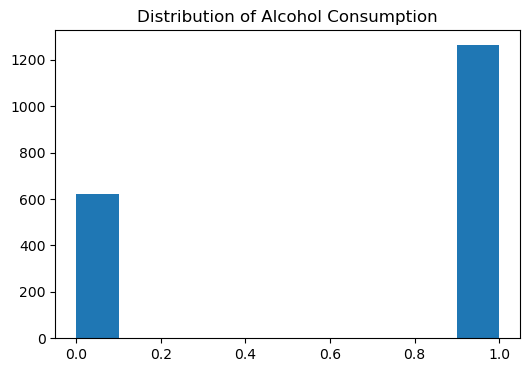

In [9]:
plt.figure(figsize=(6,4))
plt.hist(x = 'Alcohol', data = alc_output)
plt.title('Distribution of Alcohol Consumption')
plt.savefig('output_distribution.png')
plt.show()

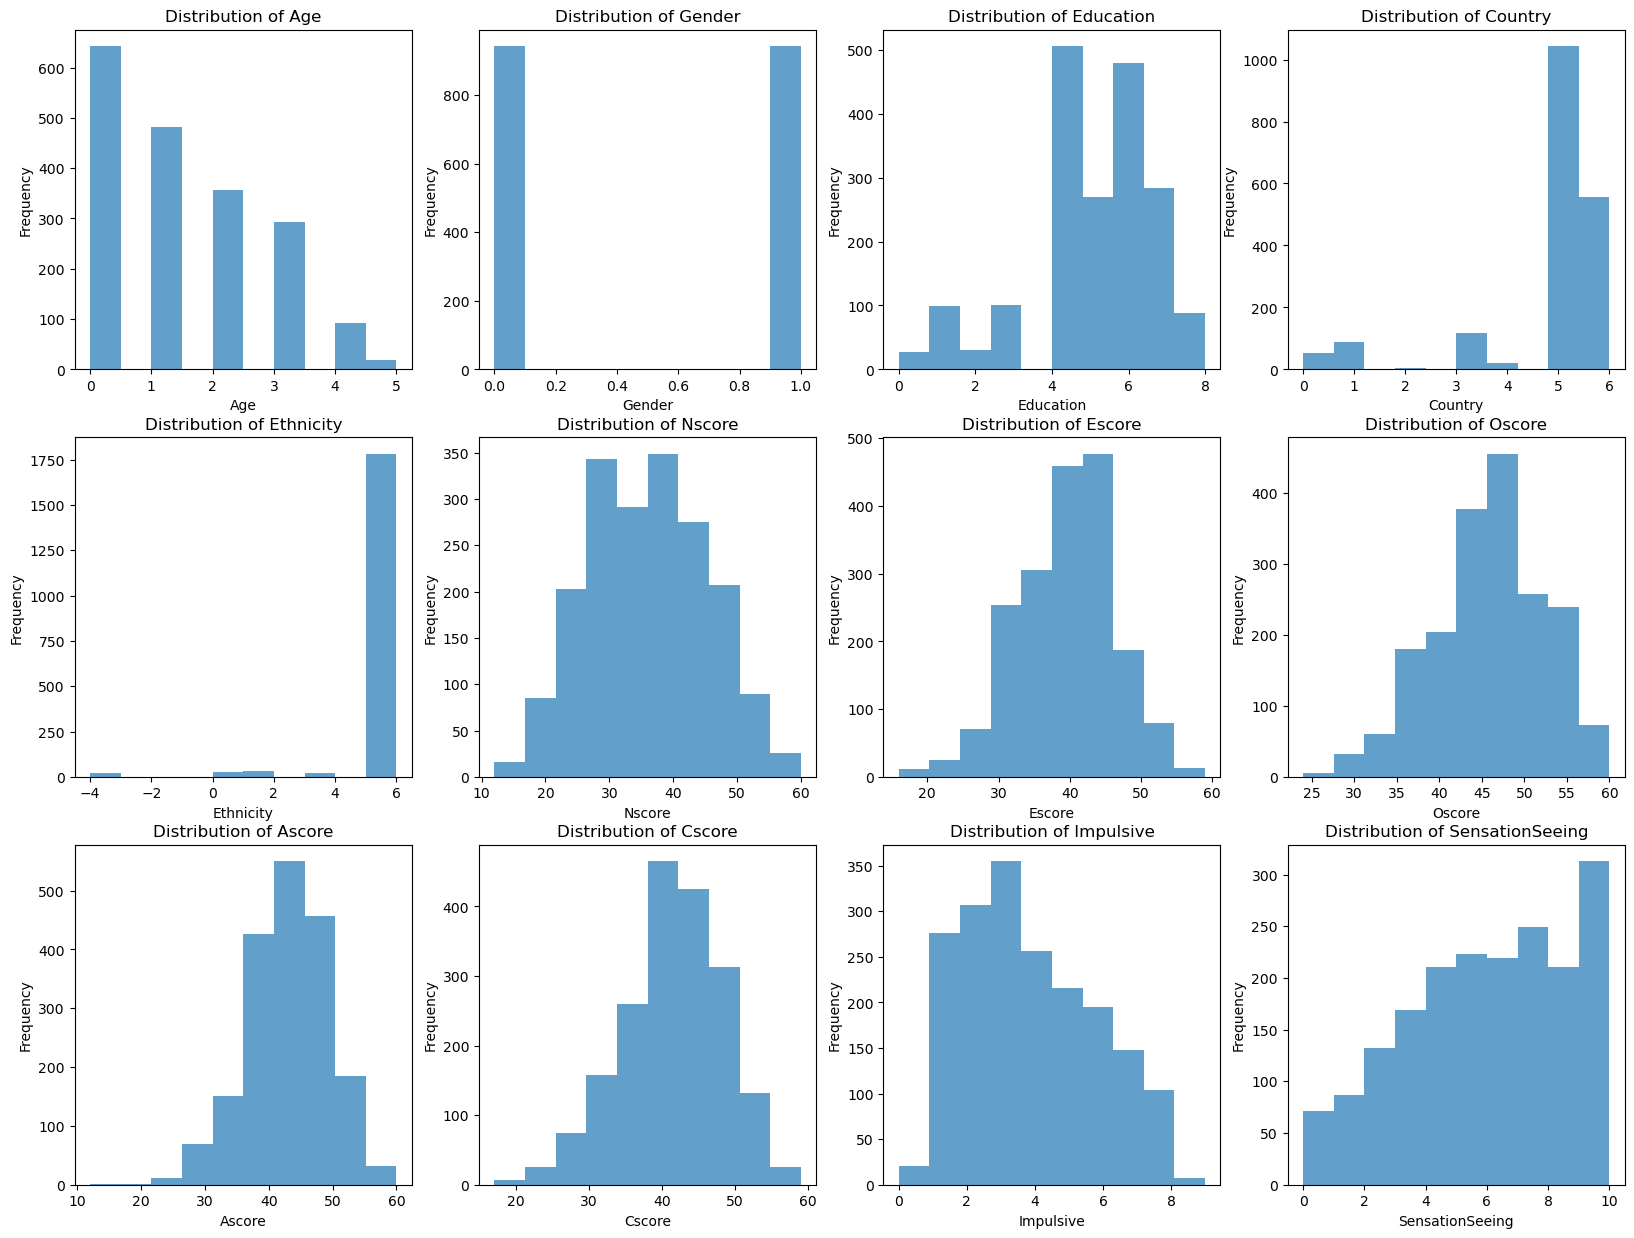

In [10]:
num_features = drugs_data.shape[1]
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize = (20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(drugs_data.columns):
    ax = axes[i]
    ax.hist(drugs_data[col], alpha=0.7)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.savefig('object_distribution.png')
plt.show()

## Scale the Data

In [11]:
scaler = MinMaxScaler()

drugs_data.iloc[:, :13] = scaler.fit_transform(drugs_data.iloc[:, :13])
alc_output.iloc[:, :] = scaler.fit_transform(alc_output.iloc[:, :])

In [12]:
drugs_data.tail()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SensationSeeing
1880,0.2,0.0,0.875,0.333333,1.0,0.625000,0.441860,0.638889,0.479167,0.547619,0.333333,0.5
1881,0.0,0.0,0.500,1.000000,0.9,0.416667,0.558140,0.722222,0.625000,0.500000,0.444444,0.9
1882,0.0,0.0,0.750,0.833333,1.0,0.500000,0.534884,0.583333,0.562500,0.523810,0.888889,0.9
1883,0.2,0.0,0.875,0.833333,1.0,0.520833,0.581395,0.527778,0.708333,0.619048,0.222222,0.7
1884,0.0,0.0,0.500,1.000000,1.0,0.708333,0.209302,0.472222,0.791667,0.357143,0.666667,0.7


In [13]:
alc_output.head()

,Alcohol
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0


In [14]:
model_reg = Sequential()
model_reg.add(Dense(1, input_dim = drugs_data.shape[1], activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-10 23:35:56.780107: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-05-10 23:35:56.780136: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-10 23:35:56.780141: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-10 23:35:56.780419: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-10 23:35:56.780428: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow 

In [15]:
model_reg.compile(loss = 'binary_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [16]:
model_reg.fit(drugs_data, alc_output, epochs = 256, verbose = 0)

2025-05-10 23:35:57.001805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-05-10 23:35:57.003858: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [17]:
loss, acc = model_reg.evaluate(drugs_data, alc_output)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc:.4f}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6507 - loss: 0.6236
Loss: 0.6127
Accuracy: 0.6732


In [18]:
model = Sequential()

In [19]:
model.add(Dense(128, input_dim = drugs_data.shape[1], activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss= 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [22]:
model.fit(x = drugs_data, y = alc_output, epochs = 512, verbose = 0)

In [23]:
loss, acc = model.evaluate(drugs_data, alc_output)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc:.4f}')

35/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0244

2025-05-10 23:39:22.379323: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.0227
Loss: 0.0186
Accuracy: 0.9952


## Phase 3

In [24]:
drugs_data = drugs_data.sample(frac = 1, random_state = 50).reset_index(drop = True)
alc_output = alc_output.sample(frac = 1, random_state = 50).reset_index(drop = True)

drugs_data.iloc[:, :13] = scaler.fit_transform(drugs_data.iloc[:, :13])
alc_output.iloc[:, :] = scaler.fit_transform(alc_output.iloc[:, :])

In [25]:
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode = min,
    verbose = 0
)

/var/folders/dj/8cd2dqkx2bbb8rmfr739gtd80000gn/T/ipykernel_63851/2670385671.py:1: UserWarning: ModelCheckpoint mode '<built-in function min>' is unknown, fallback to auto mode.
  checkpoint = ModelCheckpoint(


In [26]:
drugs_train = drugs_data.iloc[:1508, :] 
drugs_test = drugs_data.iloc[1508:, :]
alc_train = alc_output.iloc[:1508, :]
alc_test = alc_output.iloc[1508:, :]

In [27]:
model_train = Sequential()

In [28]:
model_train.add(Dense(1, input_dim = drugs_train.shape[1], activation= 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model_train.compile(loss= 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [30]:
model_train.fit(x = drugs_train, y = alc_train, epochs = 256, verbose = 0, validation_data=(drugs_test, alc_test), callbacks=[checkpoint])

In [31]:
loss, acc = model_train.evaluate(drugs_train, alc_train)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc:.4f}')

loss, acc = model_train.evaluate(drugs_test, alc_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.6041
Loss: 0.6099
Accuracy: 0.6790
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6511 - loss: 0.6358
Loss: 0.6330
Accuracy: 0.6472


In [32]:
model_train_2 = Sequential()
model_train_2.add(Dense(2, input_dim = drugs_train.shape[1], activation = 'relu'))
model_train_2.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model_train_2.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [34]:
model_train_2.fit(x = drugs_train, y = alc_train, epochs = 256, verbose = 0, validation_data=(drugs_test, alc_test), callbacks=[checkpoint])

In [35]:
loss_2, acc_2 = model_train_2.evaluate(drugs_train, alc_train)
print(f'Loss: {loss_2:.4f}')
print(f'Accuracy: {acc_2:.4f}')

loss_2, acc_2 = model_train_2.evaluate(drugs_test, alc_test)
print(f'Loss: {loss_2:.4f}')
print(f'Accuracy: {acc_2:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.6008
Loss: 0.6061
Accuracy: 0.6837
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6680 - loss: 0.6285
Loss: 0.6266
Accuracy: 0.6578


In [36]:
model_train_3 = Sequential()
model_train_3.add(Dense(4, input_dim = drugs_train.shape[1], activation = 'relu'))
model_train_3.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model_train_3.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [38]:
model_train_3.fit(x = drugs_train, y = alc_train, epochs = 256, verbose = 0, validation_data=(drugs_test, alc_test), callbacks=[checkpoint])

2025-05-10 23:41:11.795978: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [39]:
loss_3, acc_3 = model_train_3.evaluate(drugs_train, alc_train)
print(f'Loss: {loss_3:.4f}')
print(f'Accuracy: {acc_3:.4f}')

loss_3, acc_3 = model_train_3.evaluate(drugs_test, alc_test)
print(f'Loss: {loss_3:.4f}')
print(f'Accuracy: {acc_3:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6977 - loss: 0.5922
Loss: 0.5984
Accuracy: 0.6883
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6738 - loss: 0.6286
Loss: 0.6337
Accuracy: 0.6552


In [40]:
model_train_4 = Sequential()
model_train_4.add(Dense(8, input_dim = drugs_train.shape[1], activation = 'relu'))
model_train_4.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model_train_4.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [42]:
model_train_4.fit(x = drugs_train, y = alc_train, epochs=256, verbose = 0, validation_data=(drugs_test, alc_test), callbacks=[checkpoint])

In [43]:
loss_4, acc_4 = model_train_4.evaluate(drugs_train, alc_train)
print(f'Loss: {loss_4:.4f}')
print(f'Accuracy: {acc_4:.4f}')

loss_4, acc_4 = model_train_4.evaluate(drugs_test, alc_test)
print(f'Loss: {loss_4:.4f}')
print(f'Accuracy: {acc_4:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.5905
Loss: 0.5958
Accuracy: 0.6910
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6526 - loss: 0.6331
Loss: 0.6275
Accuracy: 0.6525


In [44]:
model_train_5 = Sequential()
model_train_5.add(Dense(16, input_dim = drugs_train.shape[1], activation = 'relu'))
model_train_5.add(Dense(8, activation = 'relu'))
model_train_5.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model_train_5.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [46]:
model_train_5.fit(x = drugs_train, y = alc_train, epochs = 256, verbose = 0, validation_data=(drugs_test, alc_test), callbacks=[checkpoint])

2025-05-10 23:43:05.563423: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [47]:
loss_5, acc_5 = model_train_5.evaluate(drugs_train, alc_train)
print(f'Loss: {loss_5:.4f}')
print(f'Accuracy: {acc_5:.4f}')

loss_5, acc_5 = model_train_5.evaluate(drugs_test, alc_test)
print(f'Loss: {loss_5:.4f}')
print(f'Accuracy: {acc_5:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.5674
Loss: 0.5756
Accuracy: 0.7115
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6506 - loss: 0.6393
Loss: 0.6406
Accuracy: 0.6552


In [48]:
model_train_6 = Sequential()
model_train_6.add(Dense(32, input_dim = drugs_train.shape[1], activation='relu'))
model_train_6.add(Dense(16, activation='relu'))
model_train_6.add(Dense(8, activation='relu'))
model_train_6.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model_train_6.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [50]:
model_train_6.fit(x = drugs_train, y = alc_train, epochs = 256, verbose = 0, validation_data=(drugs_test, alc_test), callbacks=[checkpoint])

2025-05-10 23:44:09.438109: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [51]:
loss_6, acc_6 = model_train_6.evaluate(drugs_train, alc_train)
print(f'Loss: {loss_6:.4f}')
print(f'Accuracy: {acc_6:.4f}')

loss_6, acc_6 = model_train_6.evaluate(drugs_test, alc_test)
print(f'Loss: {loss_6:.4f}')
print(f'Accuracy: {acc_6:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7517 - loss: 0.5130
Loss: 0.5253
Accuracy: 0.7407
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6796 - loss: 0.6996
Loss: 0.6908
Accuracy: 0.6790


In [52]:
model_train_7 = Sequential()
model_train_7.add(Dense(64, input_dim = drugs_train.shape[1], activation='relu'))
model_train_7.add(Dense(32, activation='relu'))
model_train_7.add(Dense(16, activation='relu'))
model_train_7.add(Dense(8, activation = 'relu'))
model_train_7.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model_train_7.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [54]:
model_train_7.fit(x = drugs_train, y = alc_train, epochs = 256, verbose = 0, validation_data=(drugs_test, alc_test) , callbacks=[checkpoint])

2025-05-10 23:45:16.792956: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [55]:
loss_7, acc_7 = model_train_7.evaluate(drugs_train, alc_train)
print(f'Loss: {loss_7:.4f}')
print(f'Accuracy: {acc_7:.4f}')

loss_7, acc_7 = model_train_7.evaluate(drugs_test, alc_test)
print(f'Loss: {loss_7:.4f}')
print(f'Accuracy: {acc_7:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.3837
Loss: 0.4000
Accuracy: 0.8362
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6368 - loss: 1.5658
Loss: 1.3551
Accuracy: 0.6472


In [56]:
count_ones_train = (alc_train == 1.0).sum()
print(f'Baseline Percentage: {(count_ones_train/len(alc_train))}')

count_ones_test = (alc_test == 1.0).sum()
print(f'Baseline Percentage: {(count_ones_test/len(alc_test))}')

Baseline Percentage: Alcohol    0.673077
dtype: float64
Baseline Percentage: Alcohol    0.660477
dtype: float64


## F1 Score check

In [57]:
model_1_pred_prob = model_train.predict(drugs_test)
model_2_pred_prob = model_train_2.predict(drugs_test)
model_3_pred_prob = model_train_3.predict(drugs_test)
model_4_pred_prob = model_train_4.predict(drugs_test)
model_5_pred_prob = model_train_5.predict(drugs_test)
model_6_pred_prob = model_train_6.predict(drugs_test)
model_7_pred_prob = model_train_7.predict(drugs_test)

model_1_pred = (model_1_pred_prob > 0.5).astype(int).flatten()
model_2_pred = (model_2_pred_prob > 0.5).astype(int).flatten()
model_3_pred = (model_3_pred_prob > 0.5).astype(int).flatten()
model_4_pred = (model_4_pred_prob > 0.5).astype(int).flatten()
model_5_pred = (model_5_pred_prob > 0.5).astype(int).flatten()
model_6_pred = (model_6_pred_prob > 0.5).astype(int).flatten()
model_7_pred = (model_7_pred_prob > 0.5).astype(int).flatten()

model_1_f1 = f1_score(alc_test, model_1_pred)
model_2_f1 = f1_score(alc_test, model_2_pred)
model_3_f1 = f1_score(alc_test, model_3_pred)
model_4_f1 = f1_score(alc_test, model_4_pred)
model_5_f1 = f1_score(alc_test, model_5_pred)
model_6_f1 = f1_score(alc_test, model_6_pred)
model_7_f1 = f1_score(alc_test, model_7_pred)

print(f'Model 1 F1 score: {model_1_f1}')
print(f'Model 2 F1 score: {model_2_f1}')
print(f'Model 3 F1 score: {model_3_f1}')
print(f'Model 4 F1 score: {model_4_f1}')
print(f'Model 5 F1 score: {model_5_f1}')
print(f'Model 6 F1 score: {model_6_f1}')
print(f'Model 7 F1 score: {model_7_f1}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

2025-05-10 23:46:29.795756: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model 1 F1 score: 0.7837398373983739
Model 2 F1 score: 0.7881773399014779
Model 3 F1 score: 0.7804054054054054
Model 4 F1 score: 0.7848932676518884
Model 5 F1 score: 0.7703180212014135
Model 6 F1 score: 0.7917383820998278
Model 7 F1 score: 0.7662565905096661


## Best Model

In [58]:
best_model_best = load_model('best_model.keras')

In [59]:
best_pred_prob = best_model_best.predict(drugs_test)
best_pred = (best_pred_prob > 0.5).astype(int).flatten()
print(alc_test)
best_model_best.evaluate(drugs_test, alc_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
      Alcohol
1508      0.0
1509      1.0
1510      1.0
1511      0.0
1512      0.0
...       ...
1880      1.0
1881      1.0
1882      1.0
1883      1.0
1884      0.0

[377 rows x 1 columns]
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6618 - loss: 0.6193


[0.6148596405982971, 0.6604774594306946]

In [60]:
print(len(best_pred))
alc_test_count = (alc_test == 1).sum().sum()
print(alc_test_count)

377
249


In [61]:
best_model_best.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,172 (28.02 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,587 (14.02 KB)

In [62]:
precision = precision_score(alc_test, best_pred)
recall = recall_score(alc_test, best_pred)
f1 = f1_score(alc_test, best_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Precision: 0.6795252225519288
Recall: 0.9196787148594378
F1: 0.7815699658703071


In [78]:
def build_model_single(x, y):
    model = Sequential()
    model.add(Dense(32, input_dim = 1, activation = 'relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    model.fit(x = x, y = y, epochs = 256, verbose = 0)
    return model

def eval_model(model, x, y):
    model.evaluate(x, y)
    model_pred_prob = model.predict(x)
    model_pred = (model_pred_prob > 0.5).astype(int).flatten()

    precision = precision_score(y, model_pred)
    recall = recall_score(y, model_pred)
    f1 = f1_score(y, model_pred)

    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')

In [79]:
for i in range(12):
    single_train = drugs_train.iloc[:, i]
    single_test = drugs_test.iloc[:, i]
    single_model = build_model_single(single_train, alc_train)
    eval_model(single_model, single_test, alc_test)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-11 19:10:13.084052: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6518 - loss: 0.6495
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6518 - loss: 0.6471
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

2025-05-11 19:12:01.317906: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6518 - loss: 0.6572
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6518 - loss: 0.6474


2025-05-11 19:13:52.321096: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6596 - loss: 0.6408
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6675824175824175
Recall: 0.9759036144578314
F1: 0.7928221859706363


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6518 - loss: 0.6491
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

2025-05-11 19:15:43.569921: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6518 - loss: 0.6359
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6518 - loss: 0.6494
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

2025-05-11 19:17:34.536444: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6518 - loss: 0.6478
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6518 - loss: 0.6482
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

2025-05-11 19:19:27.218439: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6518 - loss: 0.6478
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6518 - loss: 0.6398
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

2025-05-11 19:21:19.307333: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.6604774535809018
Recall: 1.0
F1: 0.7955271565495208


In [80]:
fpr, tpr, thresholds = roc_curve(alc_test, best_pred_prob)
roc_auc = roc_auc_score(alc_test, best_pred_prob)

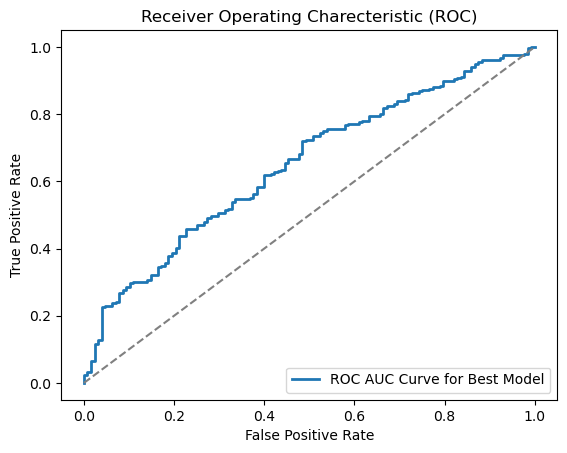

In [81]:
plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC Curve for Best Model')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Charecteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.savefig('roc_auc_curve.png')
plt.show()

In [82]:
drugs_data_reduced = drugs_data.iloc[:, 6:13]
drugs_data_reduced_train = drugs_data_reduced.iloc[:1508, :]
drugs_data_reduced_test = drugs_data_reduced.iloc[1508:, :]

In [83]:
model = Sequential()
model.add(Dense(32, input_dim = drugs_data_reduced_train.shape[1], activation = 'relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.fit(x = drugs_data_reduced_train, y = alc_train, epochs = 256, verbose = 0)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
best_pred_reduced_prob = model.predict(drugs_data_reduced_test)
best_pred = (best_pred_reduced_prob > 0.5).astype(int).flatten()
model.evaluate(drugs_data_reduced_test, alc_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6302 - loss: 0.6442 


[0.6350504159927368, 0.6498673558235168]

In [87]:
fpr, tpr, thresholds = roc_curve(alc_test, best_pred_reduced_prob)
roc_auc = roc_auc_score(alc_test, best_pred_reduced_prob)

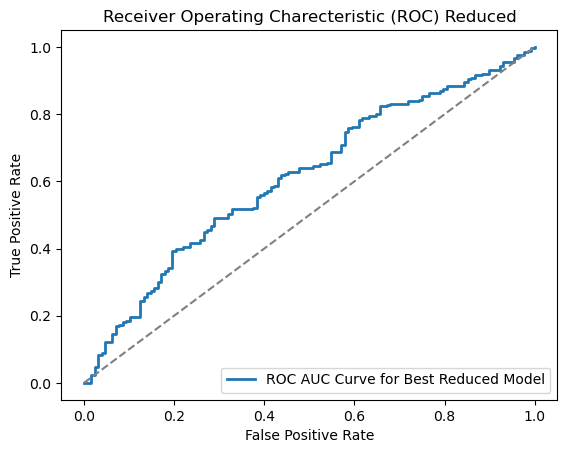

In [88]:
plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC Curve for Best Reduced Model')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Charecteristic (ROC) Reduced')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.savefig('roc_auc_curve_reduced.png')
plt.show()